# Bidirectional LSTM RNN on Snopes Data

In [1]:
# LSTM Bidirectional RNN
import pandas as pd

In [5]:
# data = pd.read_csv('Final Data/SnopesData5050.csv')

data = pd.read_csv('Final Data/SnopesDataGeneric.csv', encoding = "latin1")

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [3]:
data.head()

,ID,Post,Label
0,1,Sarah Silverman: Killing Jesus,Mixture
1,2,Can a Cattle Vaccine Be Used To Fight COVID-19?,FALSE
2,3,"At 191 Years Old, Mama Esifiho May be Oldest W...",Mixture
3,4,Customer Reports Finding Rat Head in Popeyes C...,Mixture
4,5,New York Police Officer Caught on Camera Rapin...,Mixture


In [4]:
data['Label'].value_counts()

FALSE      498
Mixture    322
TRUE       158
Name: Label, dtype: int64

In [49]:
# For binary classsification
label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [50]:
data['Label'].unique()

array([0, 1], dtype=int64)

In [51]:
data['Label'].value_counts()

0    2254
1    1683
Name: Label, dtype: int64

In [52]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis=1)
X.head()

,Post
0,Did Doctors Recommend Genital COVID-19 Vaccina...
1,Is the Age of Consent Being Lowered to 4?
2,Hawaii Official Says No Birth Certificate for ...
3,Trump Leaks Classified Info After Intelligence...
4,Did Jack Johnson Invent the Monkey Wrench?


In [53]:
# Store results

Y = data['Label']
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [54]:
X.shape, Y.shape

((3937, 1), (3937,))

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [56]:
# Vocabulary size

vocab_size = 5000

In [57]:
# Onehot Representation

messages = X.copy()

In [58]:
messages['Post'][2]

'Hawaii Official Says No Birth Certificate for President Obama?'

In [59]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Post'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [60]:
corpus

['doctor recommend genit covid vaccin inject men',
 'age consent lower',
 'hawaii offici say birth certif presid obama',
 'trump leak classifi info intellig brief',
 'jack johnson invent monkey wrench',
 'russia releas lion enforc covid lockdown',
 'steve bannon predict obama offici would end jail',
 'immin chang introduc texa insur law midst harvey',
 'oregon becom first state legal molli',
 'pussi quip',
 'hand sanit combust left hot car',
 'sharia law establish texa',
 'zello phone app work without internet',
 'presid obama declin lay wreath memori day',
 'hillari clinton wear defibril',
 'fake tweet donald trump',
 'phone number track coronaviru stimulu payment',
 'student conceal handgun stop mass stab texa colleg',
 'congress vote sell apach land foreign corpor',
 'walmart give profit trump campaign',
 'curb enthusiasm film season covid pandem',
 'girl impregn teenag ejacul pool',
 'somali muslim take small tennesse town',
 'dalla shooter identifi neo nazi jeffrey harri',
 'c hig

In [61]:
# One Hot encoding 

onehot_data = [one_hot(words, vocab_size) for words in corpus] 
onehot_data

[[2595, 4237, 2951, 63, 491, 4088, 1797],
 [1325, 1269, 4351],
 [4310, 3473, 3286, 1833, 535, 1636, 4825],
 [3041, 1673, 3786, 2038, 3507, 4234],
 [472, 3981, 4486, 494, 371],
 [4857, 2220, 1988, 4902, 63, 4755],
 [661, 3343, 70, 4825, 3473, 156, 4088, 2353],
 [4923, 4645, 1166, 3507, 1881, 1941, 3687, 3859],
 [1614, 2620, 1768, 4013, 1368, 3092],
 [4588, 2463],
 [3770, 2831, 4169, 1740, 3152, 3462],
 [2077, 1941, 4599, 3507],
 [3462, 4243, 3034, 48, 3004, 2478],
 [1636, 4825, 3070, 3468, 3005, 1434, 4845],
 [1102, 96, 1511, 4531],
 [1367, 1820, 927, 3041],
 [4243, 3734, 2236, 1670, 142, 1252],
 [4166, 960, 1034, 3680, 774, 4974, 3507, 3168],
 [2983, 189, 3495, 441, 2380, 44, 1539],
 [132, 2498, 4154, 3041, 2965],
 [1132, 2133, 4546, 2483, 63, 3726],
 [1328, 3946, 2641, 702, 459],
 [1030, 4839, 4136, 4693, 1010, 4329],
 [2409, 4694, 1858, 1631, 4904, 4305, 4222],
 [3010, 818, 2813, 1371, 1328, 4227, 2537, 715],
 [1745, 2496, 4998, 4851, 3188],
 [2317, 4667, 3916, 4646],
 [1321, 1949, 2

In [62]:
# Embedding

sentence_length = 20
embedded_data = pad_sequences(onehot_data, padding='pre', maxlen = sentence_length)
print(embedded_data)

[[   0    0    0 ...  491 4088 1797]
 [   0    0    0 ... 1325 1269 4351]
 [   0    0    0 ...  535 1636 4825]
 ...
 [   0    0    0 ... 1611 1368 3646]
 [   0    0    0 ... 3126 4245 2741]
 [   0    0    0 ... 1569 4154 1046]]


In [63]:
embedded_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2595, 4237, 2951,   63,  491, 4088, 1797])

In [64]:
# Creating Bidirectional LSTM model

# embedding_vector_features = 40
# model = Sequential()
# model.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_length))
# model.add(LSTM(100))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# print(model.summary())

In [65]:
# Creating model

embedding_vector_features = 40
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
len(embedded_data), Y.shape

(3937, (3937,))

In [67]:
import numpy as np

X_final = np.array(embedded_data)
Y_final = np.array(Y)

In [68]:
X_final.shape, Y_final.shape

((3937, 20), (3937,))

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.33, random_state = 42)

In [70]:
# Training

Rehistory = model1.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 10)

Epoch 1/10
42/42 [==============================] - 1s 28ms/step - loss: 0.6844 - accuracy: 0.5662 - val_loss: 0.6784 - val_accuracy: 0.5785
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.6500 - accuracy: 0.6147 - val_loss: 0.7288 - val_accuracy: 0.6154
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4391 - accuracy: 0.7998 - val_loss: 0.7094 - val_accuracy: 0.6354
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.2879 - accuracy: 0.8881 - val_loss: 0.9532 - val_accuracy: 0.6369
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 0.2031 - accuracy: 0.9234 - val_loss: 0.9395 - val_accuracy: 0.6515
Epoch 6/10
42/42 [==============================] - 1s 16ms/step - loss: 0.1402 - accuracy: 0.9556 - val_loss: 1.1823 - val_accuracy: 0.6615
Epoch 7/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0908 - accuracy: 0.9712 - val_loss: 1.4449 - val_accuracy: 0.6508
Epoch 8/10
42

In [71]:
# Results: Bidirectional LSTM

results = model1.evaluate(X_test, y_test, batch_size = 64)
print("test loss, test acc:", results)

21/21 [==============================] - 0s 6ms/step - loss: 1.8131 - accuracy: 0.6438
test loss, test acc: [1.8131225109100342, 0.6438461542129517]


In [72]:
# Prediction

y_pred = model1.predict(X_test)
y_pred[0]

array([0.9775708], dtype=float32)

In [73]:
# Performance and Accuracy

predictions = []
for i in range(len(y_pred)):
    if y_pred[i].item() > 0.5:
#         predictions.append(str(i) + " is Fake " + str(1))
        predictions.append(1)
    else:
#         predictions.append(str(i) +" is Not Fake " + str(0))
        predictions.append(0)

In [74]:
predictions[0]

1

In [75]:
# Classification report: BLSTM 

from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       752
           1       0.58      0.57      0.57       548

    accuracy                           0.64      1300
   macro avg       0.63      0.63      0.63      1300
weighted avg       0.64      0.64      0.64      1300



In [76]:
import matplotlib.pyplot as plt

def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

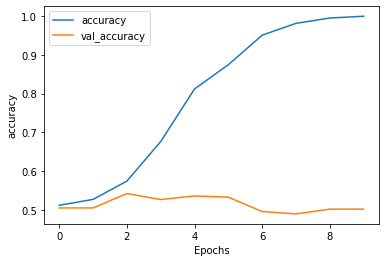

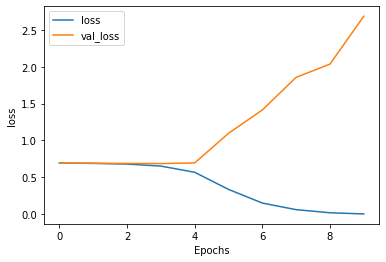

In [77]:
# Plot for BLSTM Accuracy and Loss

graph_plots(history, "accuracy")
graph_plots(history, "loss")